# EDA - Análisis Exploratorio de Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   scipy import stats

import warnings
warnings.filterwarnings("ignore")

Cargando el dataset `homicidios_merge.csv` creado a partir del merge en el proceso ETL.

In [4]:
homicidios_merge_df = pd.read_csv('../data/homicidios_merge.csv', index_col=0)
homicidios_merge_df

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,18,2016-01-10
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,PASAJEROS,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18
713,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,Point (99624.29795829 97569.69801131),-58.467398,-34.651178,MOTO-AUTO,AUTO,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20
714,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,Point (99116.45492358 101045.23284826),-58.472934,-34.619847,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02
715,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,Point (99324.54463985 97676.26932409),-58.470668,-34.650217,AUTO-CARGAS,CARGAS,CONDUCTOR,AUTO,MASCULINO,60,2021-12-20


## Analisis de nulos, duplicados y outliners.

Este análisis es fundamentales en el EDA para asegurar la calidad y confiabilidad de los datos, lo que a su vez mejora la precisión de los análisis y modelos posteriores.

## Análisis de Nulos

Los valores faltantes pueden sesgar análisis y modelos.

Es crucial identificarlos para manejarlos adecuadamente.

In [9]:
null_values = homicidios_merge_df.isnull().sum()
null_values


ID                       0
N_VICTIMAS               0
FECHA                    0
AAAA                     0
MM                       0
DD                       0
HORA                     0
HH                       0
LUGAR_DEL_HECHO          0
TIPO_DE_CALLE            0
Calle                    0
Cruce                    0
Dirección Normalizada    0
COMUNA                   0
XY (CABA)                0
pos x                    0
pos y                    0
PARTICIPANTES            0
ACUSADO                  0
ROL                      0
VICTIMA                  0
SEXO                     0
EDAD                     0
FECHA_FALLECIMIENTO      0
dtype: int64


En la tabla anterior se ve como aparece en 0 cualquier dato nulo

aún así se procede a hacer un gráfico donde se represente en color gris los datos faltantes para dar una revision visual y mas rapido de leer

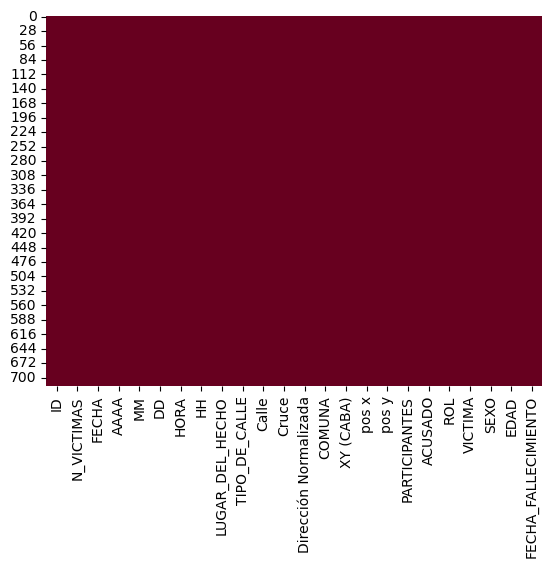

In [12]:
sns.heatmap(homicidios_merge_df.isnull(), cbar=False, cmap='RdGy')
plt.show()

Como se puede ver en la gráfica no se encuentra ningún punto gris, por ende ningún dato nulo

## Análisis de Duplicados

Los datos duplicados pueden distorsionar los resultados.

Eliminarlos garantiza una representación precisa del conjunto de datos.

In [14]:
duplicates = homicidios_merge_df.duplicated()
duplicated_rows = homicidios_merge_df[duplicates]

duplicated_rows

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,XY (CABA),pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [15]:
num_duplicates = homicidios_merge_df.duplicated().sum()
print(f"Número de filas duplicadas: {num_duplicates}")

Número de filas duplicadas: 0


No se encuentra filas duplicadas

## Análisis de Outliers

Los outliers pueden afectar la precisión de los modelos y estadísticas.

Identificarlos y tratarlos es esencial para obtener resultados fiables.

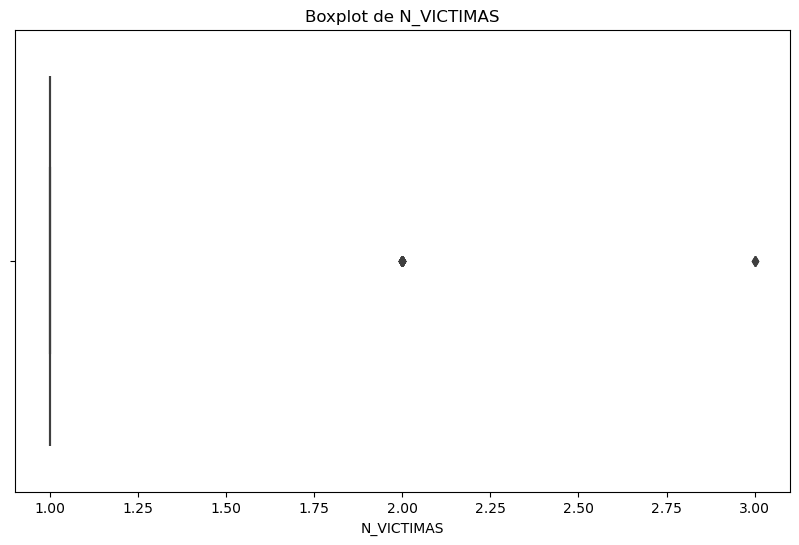

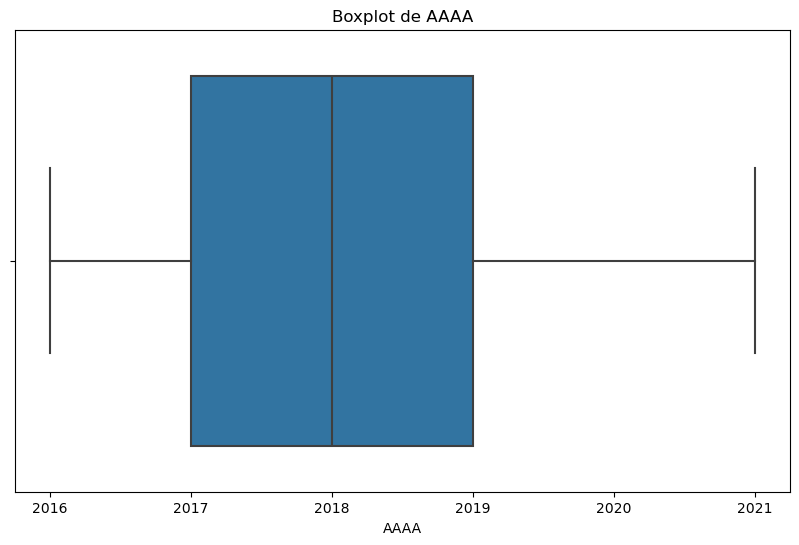

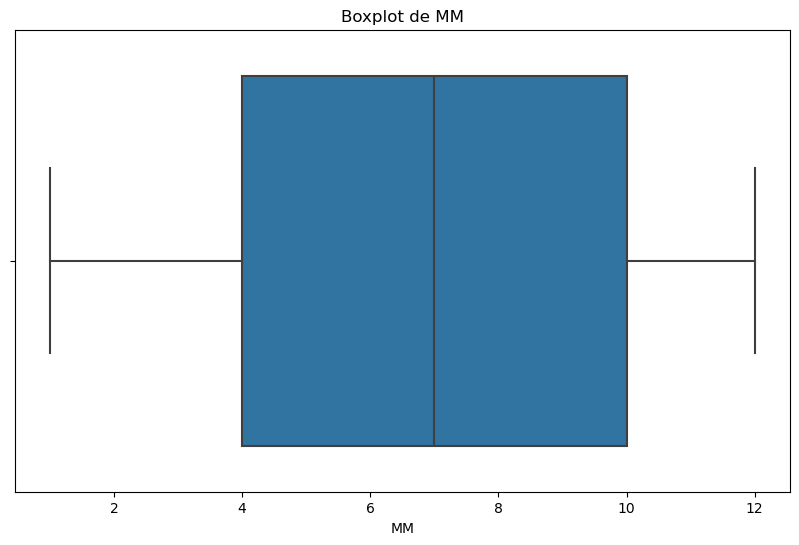

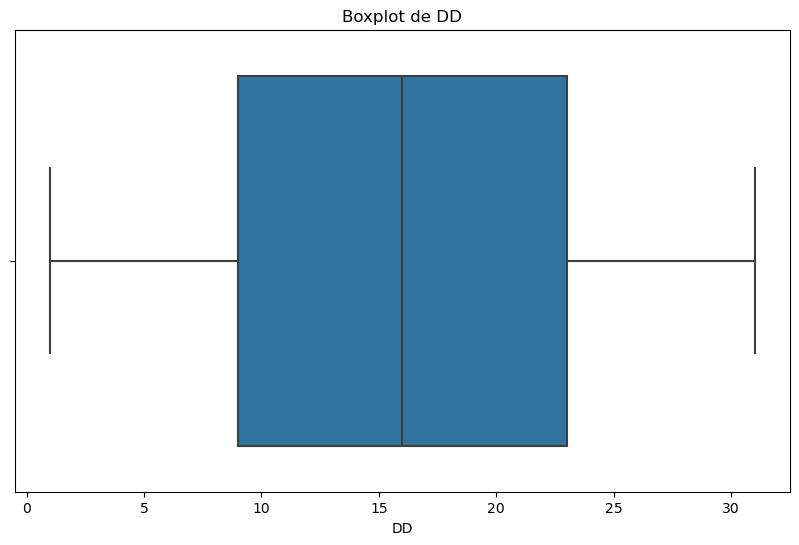

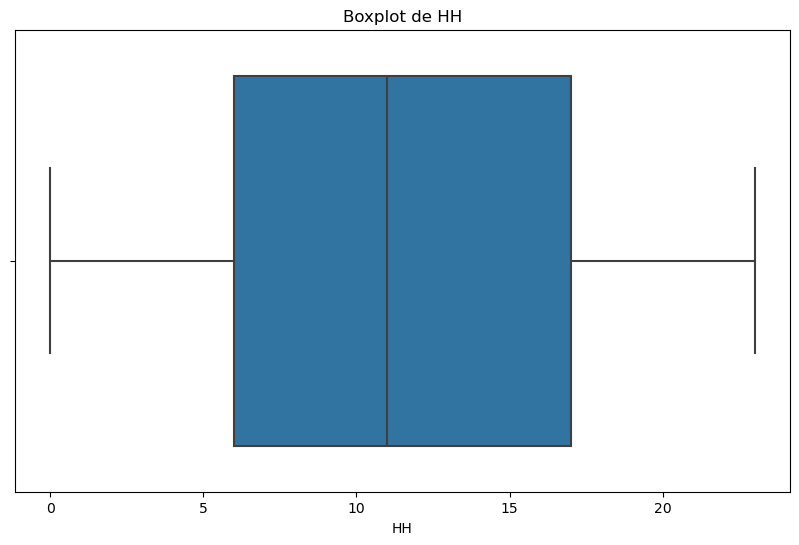

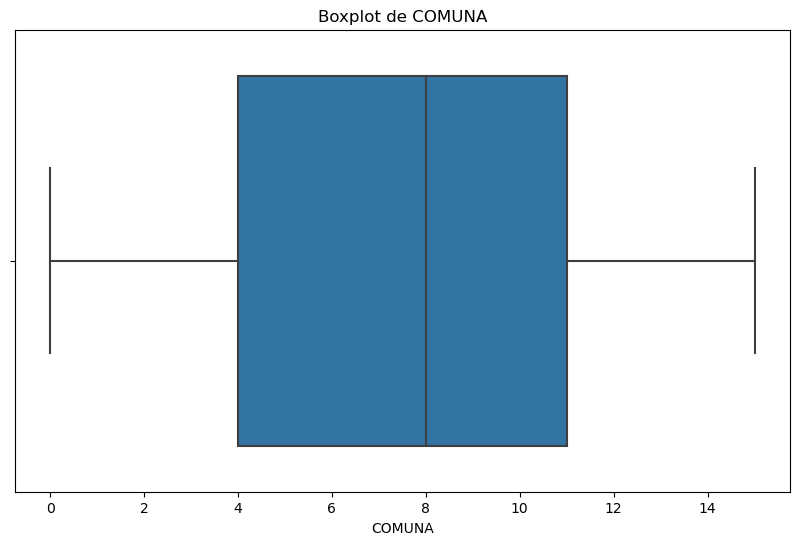

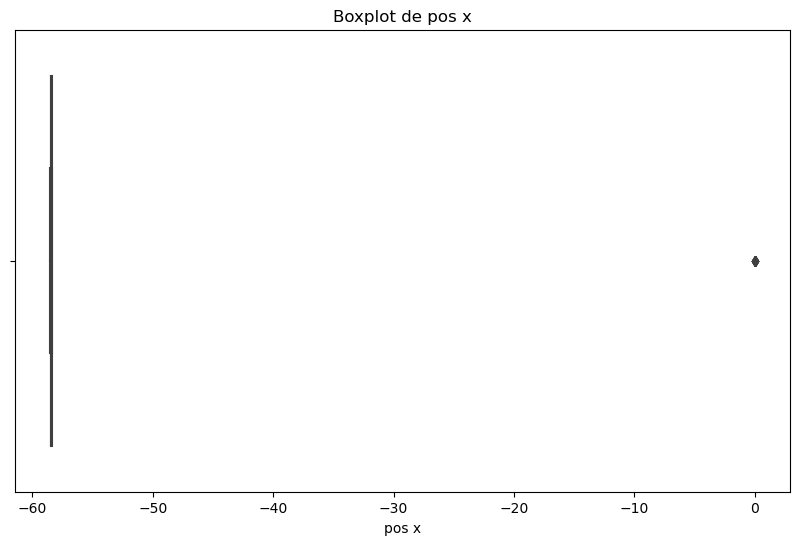

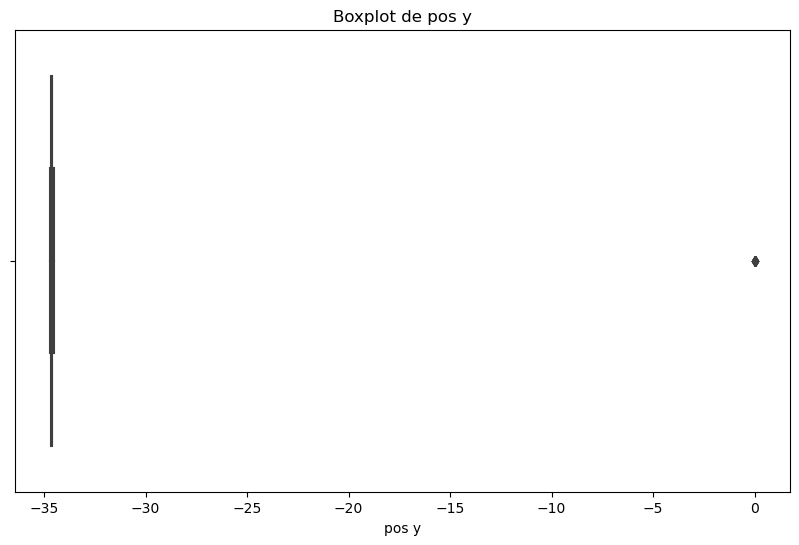

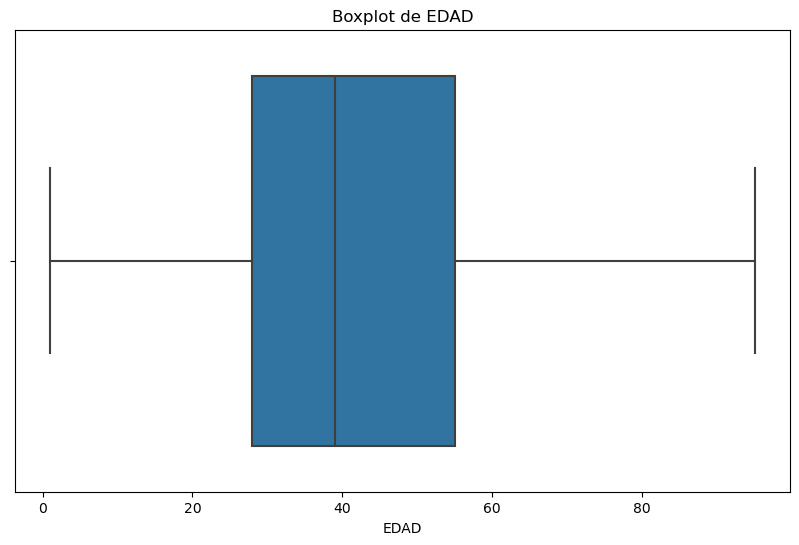

In [16]:
numeric_columns = homicidios_merge_df.select_dtypes(include=[np.number]).columns.tolist()


for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=homicidios_merge_df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()


Como se puede ver en las gráficas, ningún dato, exceptuando las gráficas de punto x y y que son coordenadas y no datos estadísticos, se encuentra fuera de rango o demuestra ser un dato alejado del resto; por ende, no se calificaría como outlier.

Sin embargo, verificaré la información con otro proceso y la presentaré en forma de texto.

In [24]:
z_scores = stats.zscore(homicidios_merge_df[numeric_columns])
abs_z_scores = np.abs(z_scores)

abs_z_scores 


,N_VICTIMAS,AAAA,MM,DD,HH,COMUNA,pos x,pos y,EDAD
0,0.238926,1.300839,1.592372,1.725029,1.124358,0.129858,0.123818,0.135598,1.211529
1,0.238926,1.300839,1.592372,1.609673,1.571813,0.358064,0.128696,0.131216,1.463065
2,0.238926,1.300839,1.592372,1.494317,0.676903,1.467583,0.111425,0.121885,0.634656
3,0.238926,1.300839,1.592372,0.686826,1.720965,0.129858,0.122315,0.133963,1.263972
4,0.238926,1.300839,1.592372,0.582089,0.975206,1.467583,0.110955,0.119563,0.687099
...,...,...,...,...,...,...,...,...,...
712,0.238926,1.690507,1.486578,0.340758,0.814614,0.098348,0.117719,0.125265,1.263972
713,0.238926,1.690507,1.486578,0.466733,1.571813,0.358064,0.122659,0.126635,0.047104
714,0.238926,1.690507,1.486578,1.620292,1.720965,0.814475,0.123467,0.118918,0.791985
715,0.238926,1.690507,1.486578,0.110047,0.229448,0.358064,0.123136,0.126398,0.938635


Se usara un umbral moderado de Z-score, donde consideramos como outliers aquellos puntos de datos que están a más de 2 desviaciones estándar del promedio. Este enfoque es más flexible que el umbral estándar y es adecuado para conjuntos de datos con menos variabilidad, permitiéndonos identificar puntos de datos que son significativamente diferentes del resto

In [30]:
threshold = 2
outlier_rows = (abs_z_scores > threshold).any(axis=1)

outlier_rows

0      False
1      False
2      False
3      False
4      False
       ...  
712    False
713    False
714    False
715    False
716    False
Length: 717, dtype: bool

Debido al resultado obtenido que muestra todos los resultados en falso, se puede verificar que no hay ningún dato outliner

# Interpretación de datos

### A continuación se realizarán algunas visualizaciónes de medidas globales, que luego podrán ser exploradas a mayor profundidad en el dashboard aprovechando la interactividad de la herramienta. Se propone analizar patrones de distribución de los accidentes y las víctimas según criterios demográficos, espaciales y temporales.

### Distribucion temporal de las víctimas

#### Número total de víctimas fatales por año

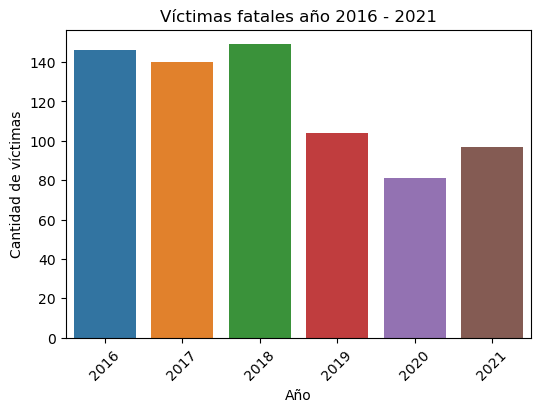

In [19]:
plt.style.use('fast')
plt.figure(figsize=(6,4))
sns.countplot(data = homicidios_merge_df, x = "AAAA")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Año')
plt.title('Víctimas fatales año 2016 - 2021')
plt.show()

El año con menos víctimas es el 2020, se asume que esto sucecdió debido a los confinamientos por Covid 19

#### Distribución de vícitmas fatales por mes

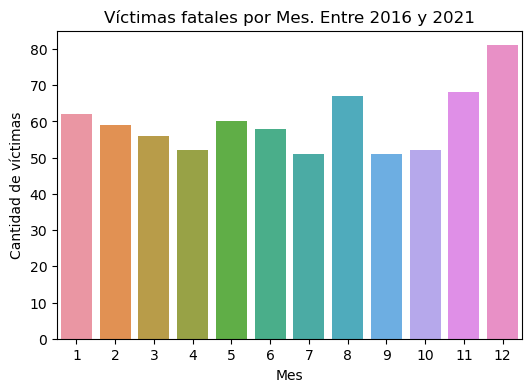

In [20]:
# Distribución de víctimas por mes
mes = homicidios_merge_df.groupby('MM').agg({'N_VICTIMAS':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(6,4))
ax = sns.barplot(x='MM', y='N_VICTIMAS', data=mes)
ax.set_title('Víctimas fatales por Mes. Entre 2016 y 2021')
ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

Se observa un pico notorio en la cantidad de víctimas durante el mes de diciembre. Otros meses que también tienen una cantidad notablemente más alta son noviembre y agosto.

#### Distribución de accidentes con víctimas fatales por mes, gráficos anuales comparados:

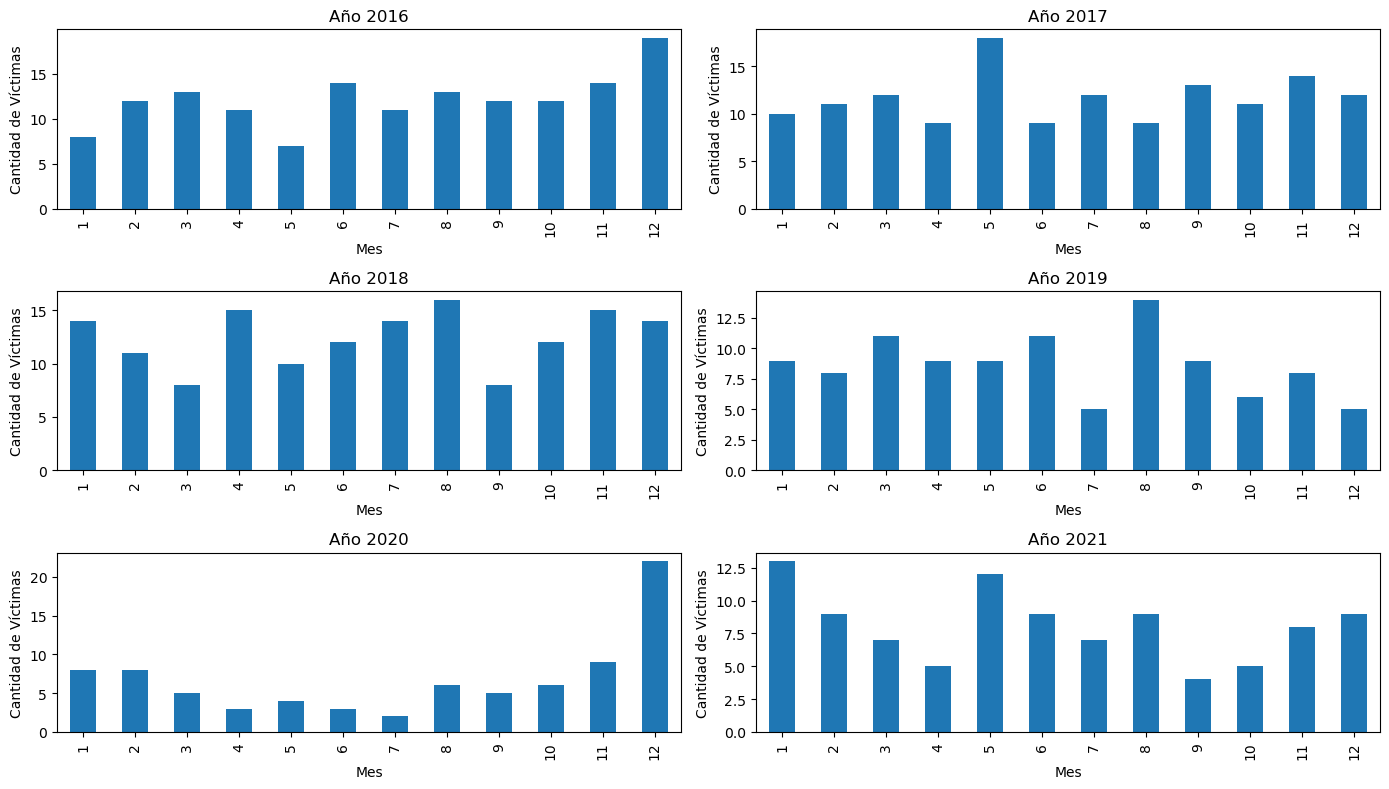

In [21]:
#gráfica con subplots por año, para comparar tendencias
anios = homicidios_merge_df['AAAA'].unique()

n_filas = 3
n_columnas = 2
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(14, 8))

for i, year in enumerate(anios):
    fila = i // n_columnas
    columna = i % n_columnas
    data_mensual = (homicidios_merge_df[homicidios_merge_df['AAAA'] == year].groupby('MM').agg({'N_VICTIMAS':'count'}))
        
     # Se configura el subgráfico actual
    ax = axes[fila, columna]
    data_mensual.plot(ax=ax, kind='bar')
    ax.set_title('Año ' + str(year)) ; ax.set_xlabel('Mes') ; ax.set_ylabel('Cantidad de Víctimas')
    ax.legend_ = None
        
    # Se muestra y acomoda el gráfico
plt.tight_layout()
plt.show()

A diferencia del gráfico acumulado, es interesante observar que al analizar año por año ya no se observa con tanta consistencia un patrón relacionado con la accidentalidad según los meses del año.

#### Distribución de accidentes con víctimas fatales, día por día a lo largo del mes

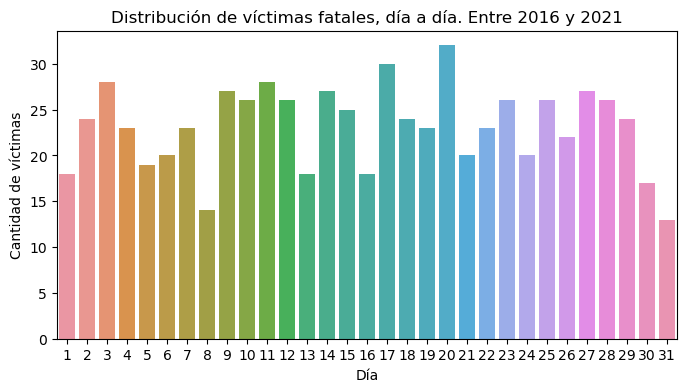

In [22]:
#Distribución de víctimas por día de la semana
dia = homicidios_merge_df.groupby('DD').agg({'N_VICTIMAS':'count'}).reset_index()
    
    # Se grafica
plt.figure(figsize=(8,4))
ax = sns.barplot(x='DD', y='N_VICTIMAS', data=dia)
ax.set_title('Distribución de víctimas fatales, día a día. Entre 2016 y 2021')
ax.set_xlabel('Día') ; ax.set_ylabel('Cantidad de víctimas')
plt.show()

### Distribución demográfica de las víctimas.

#### Cantidad de víctimas fatales de cada año, entre 2016 y 2021, discriminadas por sexo

In [23]:
homicidios_merge_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'ACUSADO', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

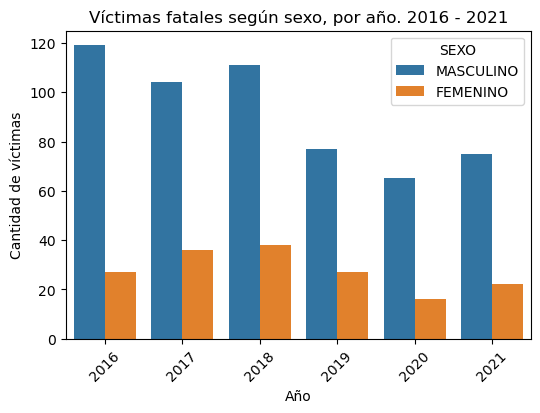

In [24]:
#Víctimas según sexo, por año
plt.figure(figsize=(6,4))
sns.countplot(data = homicidios_merge_df, x = "AAAA", hue='SEXO')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Año')
plt.title('Víctimas fatales según sexo, por año. 2016 - 2021')
plt.show()

Es evidente en la gráfica que son muchos más los hombres que las mujeres que fallecen en accidentes de tránsito. Valdrá la pena explorar proporciones y contrastar con los tipos de vehículos involucrados, los roles y la participación de estos en los accidentes.

#### Cantidad de víctimas según su sexo y rango de edad

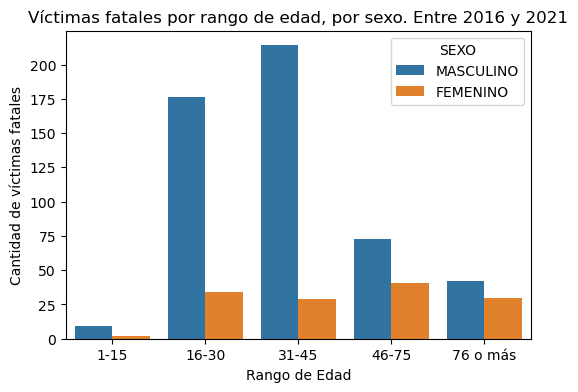

In [25]:
#Víctimas por sexo, según rango de edad 
# Creamos los rangos de edad
bins = [0, 15, 30, 45, 60, 75]
labels = ['1-15', '16-30', '31-45', '46-75', '76 o más']
homicidios_merge_df['Rango_Edad'] = pd.cut(homicidios_merge_df['EDAD'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(6,4))
sns.countplot(data = homicidios_merge_df, x = "Rango_Edad", hue='SEXO')
plt.ylabel('Cantidad de víctimas fatales')
plt.xlabel('Rango de Edad')
plt.title('Víctimas fatales por rango de edad, por sexo. Entre 2016 y 2021')
plt.show()


Fueron pocas las personas mayores de 80 años que muerieron en accidentes de tránsito, podemos encontrarlos como outliers en la gráfica en los años 2016, 2017 y 2019.
La gran mayoría de las víctimas se cuentan entre los 16 y los 45 años de edad.

### Estadísticas según tipo de usuario

#### Víctimas fatales según el vehículo que ocupaban


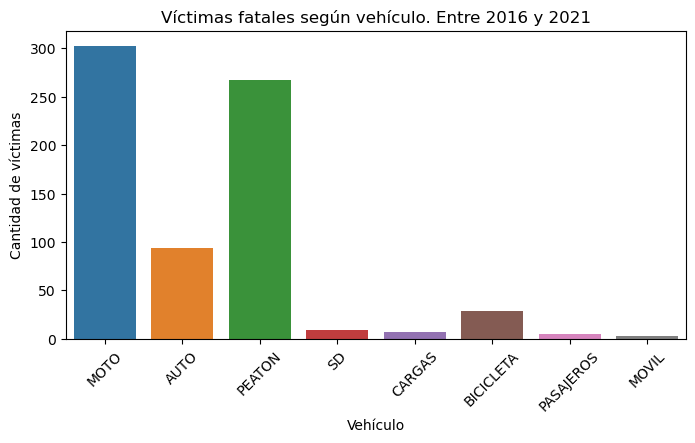

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(data = homicidios_merge_df, x = "VICTIMA")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo')
plt.title('Víctimas fatales según vehículo. Entre 2016 y 2021')
plt.show()

Repito la gráfica anterior, discriminando por sexo

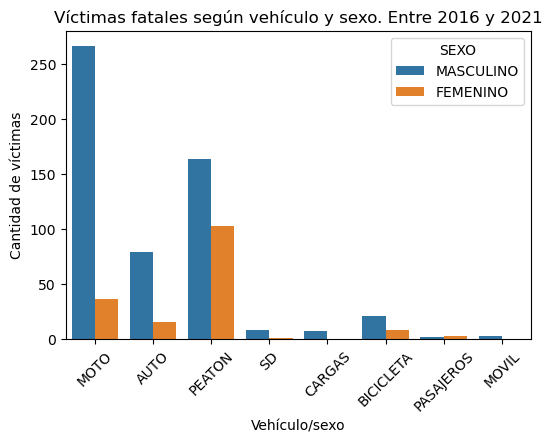

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(data = homicidios_merge_df, x = "VICTIMA", hue='SEXO')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo/sexo')
plt.title('Víctimas fatales según vehículo y sexo. Entre 2016 y 2021')
plt.show()

Los motociclistas y los peatones son quienes se encuentran más vulnerables en un accidente vial y eso queda evidenciado en la cantidad de fallecimientos correspondientes a estas dos categorías.

#### Distribución de víctimas según el Rol, es decir, la posición relativa al vehículo que presentaba ésta en el momento del siniestro.

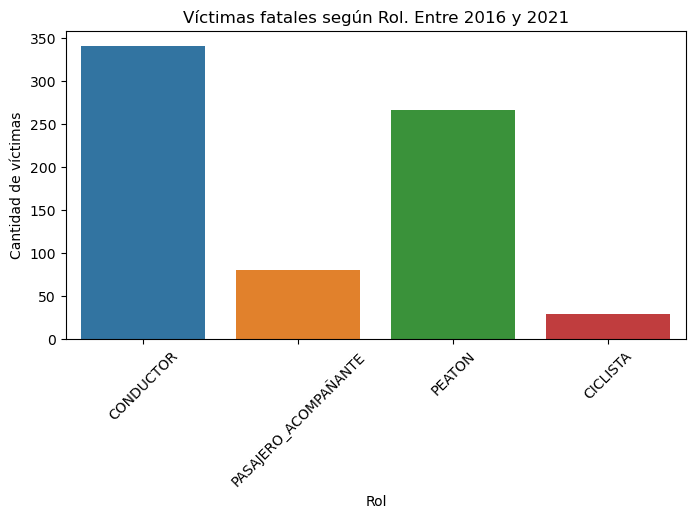

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(data = homicidios_merge_df, x = "ROL")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Rol')
plt.title('Víctimas fatales según Rol. Entre 2016 y 2021')
plt.show()

Repito la gráfica anterior, discriminando por sexo

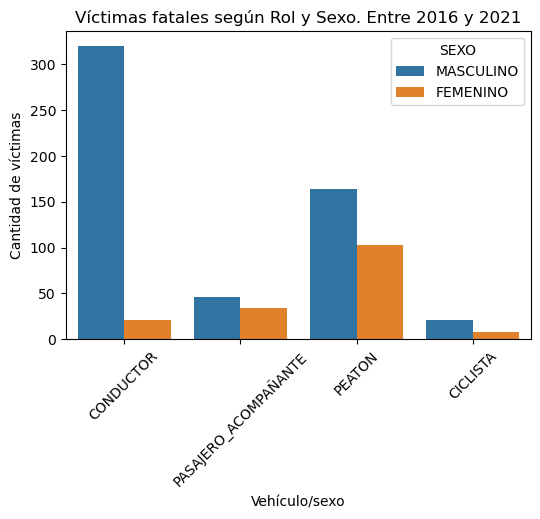

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(data = homicidios_merge_df, x = "ROL", hue='SEXO')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Vehículo/sexo')
plt.title('Víctimas fatales según Rol y Sexo. Entre 2016 y 2021')
plt.show()

Son los conductores quienes tienen más cantidad de víctimas fatales, seguidos por los peatones. Vale la pena combinar rol y vehículo al elaborar el dashboard, pues me atrevo a predecir que una alta proporción de estos conductores debían ser motociclistas

#### Distibución según los participantes en los accidentes
La columna participantes muestra la combinación de vehículos involucrados en un accidente.

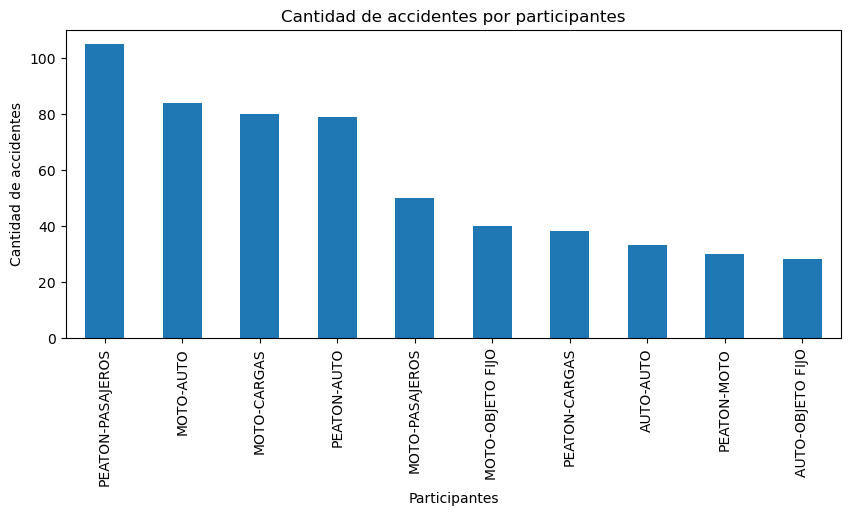

In [30]:
plt.figure(figsize=(10,4))
participantes=homicidios_merge_df.groupby("PARTICIPANTES")["N_VICTIMAS"].count()
participantes.sort_values(ascending=False).head(10).plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Cantidad de accidentes por participantes')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Participantes')
plt.show()

Únicamente en dos de las diez  posibles combinaciones no está involucrado un peatón o un motociclista. Esto sigue dejando en evidencia la vulnerabilidad de estos en los siniestros viales y nos da insights de hacia dónde deberían encaminarse las campañas de prevencion para reducir los indices de accidentalidad y muertes.

### Distribución espacial de los accidentes con víctimas fatales

### Accidentes según el tipo de vía

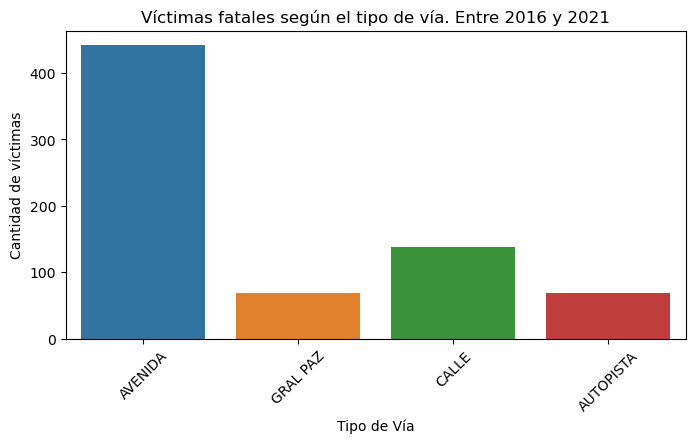

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(data = homicidios_merge_df, x = "TIPO_DE_CALLE")
plt.xticks(rotation=45)
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Tipo de Vía')
plt.title('Víctimas fatales según el tipo de vía. Entre 2016 y 2021')
plt.show()

La accidentalidad es notoriamente más alta en las Avenidas, que en los demás tipos de vías.

#### Accidentes por comuna

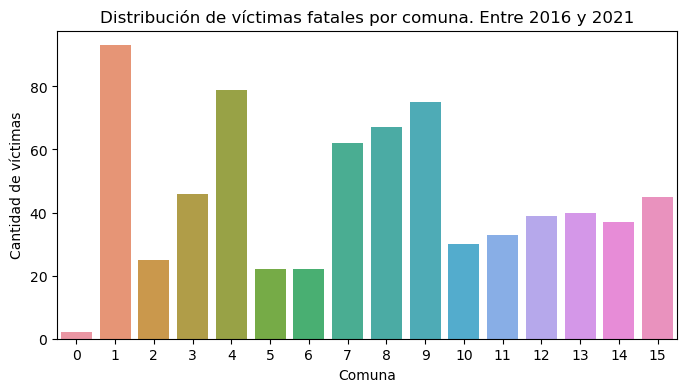

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(data = homicidios_merge_df, x = "COMUNA")
plt.ylabel('Cantidad de víctimas')
plt.xlabel('Comuna')
plt.title('Distribución de víctimas fatales por comuna. Entre 2016 y 2021')
plt.show()

Las tres comunas con mayor cantidad de vícitimas fatales son la 1, la 4 y la 9.